In [41]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import catboost as cb
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [42]:
df = pd.read_csv("hybrid_data_1.csv")

In [43]:
df.head()

,material type,SA,TPV,C,H,N,O,T,P,CO2
0,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,Microporous,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,Microporous,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,Hierarchical,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [44]:
dummies = pd.get_dummies(df['material type'],prefix='type')
df[list(dummies.columns)] = dummies

l = [
 'type_Hierarchical',
 'type_Macroporous',
 'type_Mesoporous',
 'type_Microporous',
 'SA',
 'TPV',
 'C',
 'H',
 'N',
 'O',
 'T',
 'P',
 'CO2']

df = df[l]

df.head()

,type_Hierarchical,type_Macroporous,type_Mesoporous,type_Microporous,SA,TPV,C,H,N,O,T,P,CO2
0,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,0,0,0,1,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,0,0,0,1,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,1,0,0,0,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [45]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.CO2, test_size = 0.2,random_state=0)

In [46]:
numeric_features = ['SA', 'TPV', 'C', 'H', 'N', 'O', 'T', 'P']
categorical_features = ['type_Hierarchical', 'type_Macroporous', 'type_Mesoporous', 'type_Microporous']

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_KNN", KNNImputer(n_neighbors=10)),
        ("standard_scaler", StandardScaler()),
    ]
)

# ColumnTransformer for preprocessing
preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_preprocessor, numeric_features),
    ('categorical', 'passthrough', categorical_features),
])

In [47]:
pipe = Pipeline(
steps=[
    ("preprocessor",preprocessing),
    ("regressor",cb.CatBoostRegressor(loss_function='RMSE',l2_leaf_reg=1,learning_rate=0.1,n_estimators=300))
])

In [48]:
pipe.fit(X_train,y_train)

0:	learn: 1.5843472	total: 1.19ms	remaining: 355ms
1:	learn: 1.4992083	total: 2.27ms	remaining: 338ms
2:	learn: 1.4442797	total: 2.97ms	remaining: 294ms
3:	learn: 1.3758886	total: 3.79ms	remaining: 280ms
4:	learn: 1.3120650	total: 4.35ms	remaining: 257ms
5:	learn: 1.2578939	total: 5.1ms	remaining: 250ms
6:	learn: 1.2039211	total: 6.43ms	remaining: 269ms
7:	learn: 1.1630867	total: 7.15ms	remaining: 261ms
8:	learn: 1.1232330	total: 7.97ms	remaining: 258ms
9:	learn: 1.0797286	total: 8.65ms	remaining: 251ms
10:	learn: 1.0389296	total: 9.54ms	remaining: 251ms
11:	learn: 1.0055992	total: 10.5ms	remaining: 251ms
12:	learn: 0.9745432	total: 11.5ms	remaining: 254ms
13:	learn: 0.9486126	total: 12.5ms	remaining: 255ms
14:	learn: 0.9275059	total: 13.3ms	remaining: 253ms
15:	learn: 0.9042858	total: 14.2ms	remaining: 251ms
16:	learn: 0.8798211	total: 14.9ms	remaining: 248ms
17:	learn: 0.8614192	total: 15.7ms	remaining: 246ms
18:	learn: 0.8423973	total: 16.5ms	remaining: 243ms
19:	learn: 0.8261720	to

228:	learn: 0.0889477	total: 188ms	remaining: 58.2ms
229:	learn: 0.0880021	total: 189ms	remaining: 57.5ms
230:	learn: 0.0871730	total: 190ms	remaining: 56.6ms
231:	learn: 0.0863791	total: 190ms	remaining: 55.8ms
232:	learn: 0.0852495	total: 191ms	remaining: 55ms
233:	learn: 0.0843735	total: 192ms	remaining: 54.1ms
234:	learn: 0.0834805	total: 193ms	remaining: 53.3ms
235:	learn: 0.0824184	total: 193ms	remaining: 52.5ms
236:	learn: 0.0822249	total: 194ms	remaining: 51.6ms
237:	learn: 0.0813155	total: 195ms	remaining: 50.8ms
238:	learn: 0.0810971	total: 196ms	remaining: 49.9ms
239:	learn: 0.0807363	total: 196ms	remaining: 49.1ms
240:	learn: 0.0796685	total: 197ms	remaining: 48.2ms
241:	learn: 0.0790921	total: 198ms	remaining: 47.4ms
242:	learn: 0.0788360	total: 198ms	remaining: 46.5ms
243:	learn: 0.0786359	total: 199ms	remaining: 45.7ms
244:	learn: 0.0780132	total: 200ms	remaining: 44.9ms
245:	learn: 0.0775704	total: 201ms	remaining: 44.1ms
246:	learn: 0.0771189	total: 202ms	remaining: 43

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P']),
                                                 ('categorical', 'passthrough',
                                                  ['type_Hierarchical',
                                                   'type_Macroporous',
                                                   'type_Mesoporous',
                                                   'type_Microporous'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000001AB3689E010>)])

In [49]:
r2_score(y_train,pipe.predict(X_train))

0.9989117598566442

In [50]:
r2_score(y_test,pipe.predict(X_test))

0.8809499483016436

In [51]:
import shap

In [55]:
model = cb.CatBoostRegressor(loss_function='RMSE',l2_leaf_reg=1,learning_rate=0.1,n_estimators=300)

X_train_preprocessed = pd.DataFrame(preprocessing.fit_transform(X_train), columns=numeric_features + categorical_features)
X_test_preprocessed = pd.DataFrame(preprocessing.fit_transform(X_test), columns=numeric_features + categorical_features)

model.fit(X_train_preprocessed,y_train)


0:	learn: 1.5843472	total: 1.41ms	remaining: 422ms
1:	learn: 1.4992083	total: 2.57ms	remaining: 383ms
2:	learn: 1.4442797	total: 3.68ms	remaining: 364ms
3:	learn: 1.3758886	total: 4.74ms	remaining: 351ms
4:	learn: 1.3120650	total: 5.4ms	remaining: 319ms
5:	learn: 1.2578939	total: 6.16ms	remaining: 302ms
6:	learn: 1.2039211	total: 6.94ms	remaining: 291ms
7:	learn: 1.1630867	total: 7.62ms	remaining: 278ms
8:	learn: 1.1232330	total: 8.45ms	remaining: 273ms
9:	learn: 1.0797286	total: 9.17ms	remaining: 266ms
10:	learn: 1.0389296	total: 9.91ms	remaining: 260ms
11:	learn: 1.0055992	total: 10.7ms	remaining: 256ms
12:	learn: 0.9745432	total: 11.5ms	remaining: 255ms
13:	learn: 0.9486126	total: 12.4ms	remaining: 253ms
14:	learn: 0.9275059	total: 13.2ms	remaining: 251ms
15:	learn: 0.9042858	total: 14ms	remaining: 249ms
16:	learn: 0.8798211	total: 14.9ms	remaining: 248ms
17:	learn: 0.8614192	total: 15.7ms	remaining: 246ms
18:	learn: 0.8423973	total: 16.5ms	remaining: 244ms
19:	learn: 0.8261720	tota

233:	learn: 0.0843735	total: 176ms	remaining: 49.7ms
234:	learn: 0.0834805	total: 177ms	remaining: 48.9ms
235:	learn: 0.0824184	total: 178ms	remaining: 48.2ms
236:	learn: 0.0822249	total: 178ms	remaining: 47.4ms
237:	learn: 0.0813155	total: 179ms	remaining: 46.6ms
238:	learn: 0.0810971	total: 180ms	remaining: 45.9ms
239:	learn: 0.0807363	total: 180ms	remaining: 45.1ms
240:	learn: 0.0796685	total: 181ms	remaining: 44.3ms
241:	learn: 0.0790921	total: 182ms	remaining: 43.6ms
242:	learn: 0.0788360	total: 182ms	remaining: 42.8ms
243:	learn: 0.0786359	total: 183ms	remaining: 42ms
244:	learn: 0.0780132	total: 184ms	remaining: 41.3ms
245:	learn: 0.0775704	total: 184ms	remaining: 40.5ms
246:	learn: 0.0771189	total: 185ms	remaining: 39.7ms
247:	learn: 0.0768386	total: 186ms	remaining: 39ms
248:	learn: 0.0764433	total: 186ms	remaining: 38.2ms
249:	learn: 0.0759671	total: 187ms	remaining: 37.4ms
250:	learn: 0.0755762	total: 188ms	remaining: 36.7ms
251:	learn: 0.0752337	total: 189ms	remaining: 35.9

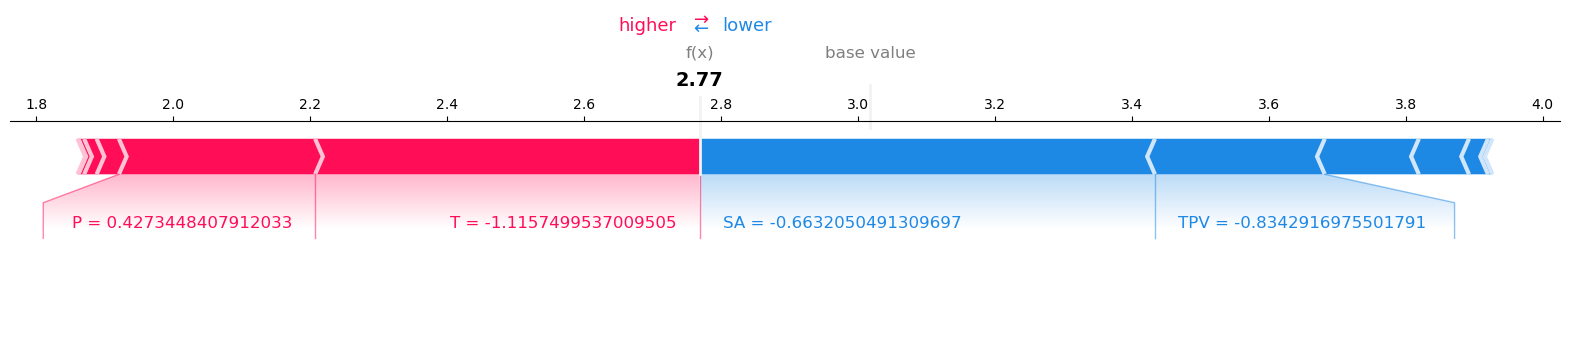

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train_preprocessed)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0,:],matplotlib=True)

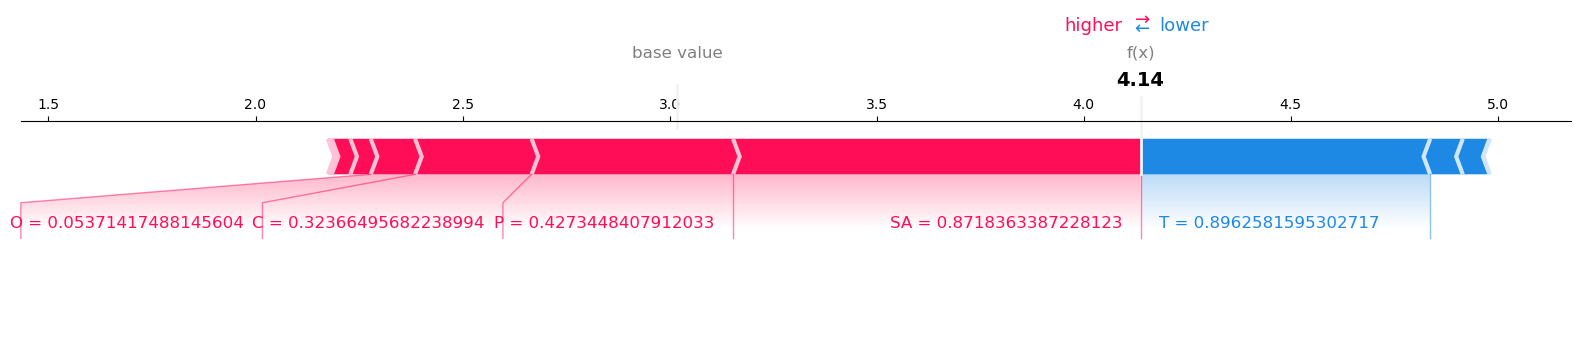

In [75]:
shap.plots.force(shap_values[2,:],matplotlib=True)

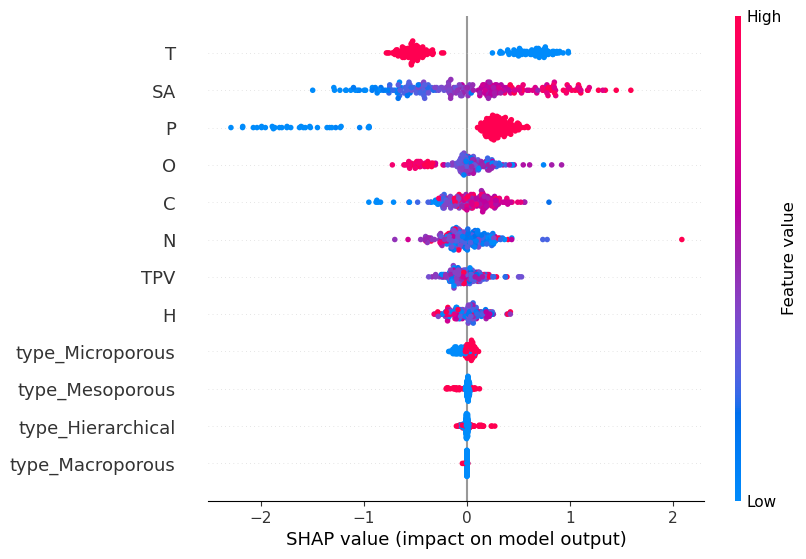

In [76]:
shap.plots.beeswarm(shap_values,max_display=20)

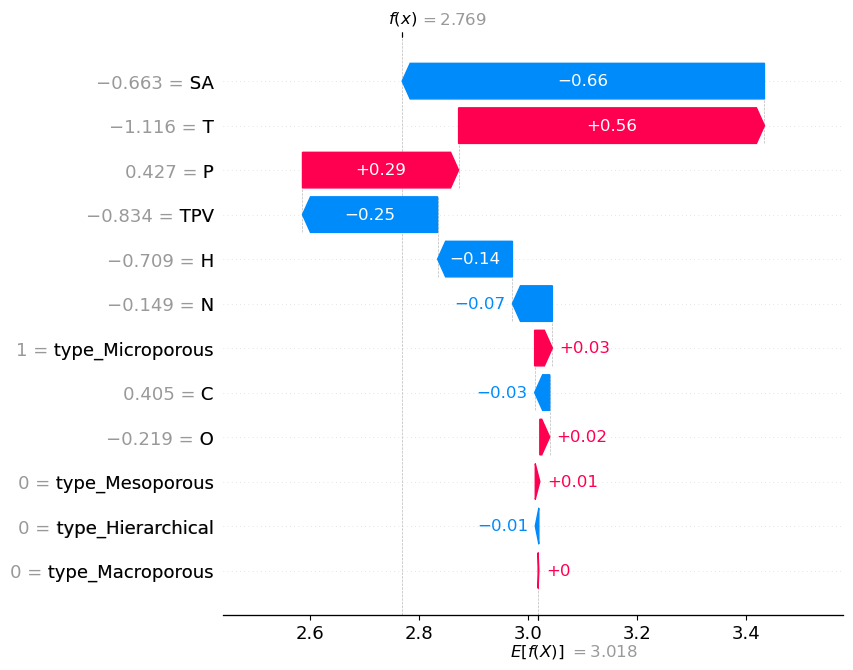

In [72]:
shap.plots.waterfall(shap_values[0],max_display=20)

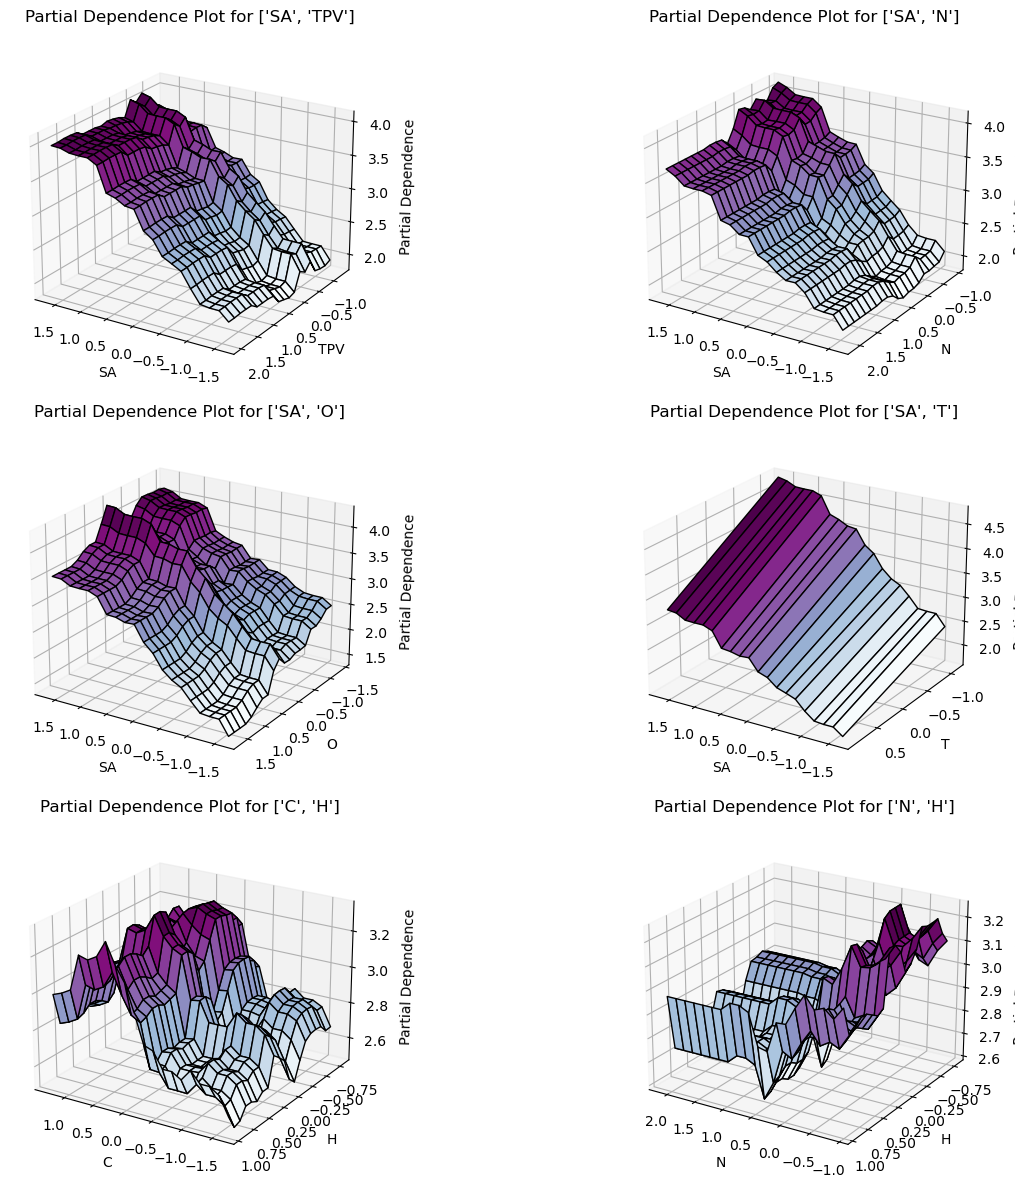

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.inspection import partial_dependence

def plot_3d_partial_dependence(model, X, feature_pairs):
    """
    Generate 3D partial dependence plots for specified feature pairs.

    Parameters:
    - model: The trained machine learning model
    - X: Feature matrix
    - feature_pairs: List of feature pairs for which partial dependence plots are to be generated
    """
    fig = plt.figure(figsize=(15, 12))

    for i, features in enumerate(feature_pairs, start=1):
        pdp = partial_dependence(model, X, features=features, kind="average", grid_resolution=20)
        XX, YY = np.meshgrid(pdp["grid_values"][0], pdp["grid_values"][1])
        Z = pdp.average[0].T

        ax = fig.add_subplot(3, 2, i, projection="3d")
        surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")

        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel("Partial Dependence")
        ax.set_title(f"Partial Dependence Plot for {features}")

        # Pretty initialization view
        ax.view_init(elev=22, azim=122)

    # Adjust layout for better visualization
    fig.tight_layout()
    plt.show()

# Example usage
plot_3d_partial_dependence(model, X_train_preprocessed, [['SA', 'TPV'], ['SA', 'N'], ['SA', 'O'], ['SA', 'T'], ['C', 'H'], ['N', 'H']])
